# Exercise 1

Let us consider the following document-term matrix $A$:

In [1]:
import sklearn
import numpy as np
import sklearn.feature_extraction

np.set_printoptions(suppress=True)

vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)

documents = [
    'The graph of a function in two variables is a surface in the 3D space',
    'The partial derivative is the ordinary derivative of a partial function',
    'The gradient of a two-variables function contains its partial derivatives',
    'The gradient vector is orthogonal to the normal vector'
    'The partial derivatives are the slopes of the tangent plane',
    'The tangent plane is the linear approximation of a surface',
    'If a function is convex then any local minimizer is a global minimizer',
    'If a continuous function is defined on a compact set then there exists a global minimum'
    'Norms of vector spaces are convex functions'
    'A steepest descent method uses the opposite of the gradient direction',
    'The steepest descent method is globally convergent if the Wolfe condition holds',
    'The Hessian matrix is the matrix of second-order partial derivatives',
    'The Hessian matrix of a convex function is positive semi-definite'
]

X = vectorizer.fit_transform(documents).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = X.T
print(A.shape)

vectorizer.vocabulary_: {'the': 54, 'graph': 22, 'of': 36, 'function': 17, 'in': 26, 'two': 58, 'variables': 60, 'is': 27, 'surface': 52, '3d': 0, 'space': 49, 'partial': 42, 'derivative': 12, 'ordinary': 40, 'gradient': 21, 'contains': 6, 'its': 28, 'derivatives': 13, 'vector': 61, 'orthogonal': 41, 'to': 57, 'normal': 35, 'vectorthe': 62, 'are': 3, 'slopes': 48, 'tangent': 53, 'plane': 43, 'linear': 29, 'approximation': 2, 'if': 25, 'convex': 9, 'then': 55, 'any': 1, 'local': 30, 'minimizer': 33, 'global': 19, 'continuous': 7, 'defined': 10, 'on': 37, 'compact': 4, 'set': 47, 'there': 56, 'exists': 16, 'minimumnorms': 34, 'spaces': 50, 'functionsa': 18, 'steepest': 51, 'descent': 14, 'method': 32, 'uses': 59, 'opposite': 38, 'direction': 15, 'globally': 20, 'convergent': 8, 'wolfe': 63, 'condition': 5, 'holds': 24, 'hessian': 23, 'matrix': 31, 'second': 45, 'order': 39, 'positive': 44, 'semi': 46, 'definite': 11}
(64, 10)


The following query is given: "gradient vector"

In [2]:
#query vector
query1text = ['gradient vector']
query_stem = query1text[0]
query1 = []
query1.append(query_stem)
query1 = vectorizer.transform(query1).toarray()

To search for the relevant documents, compute the cosine similarity between the query vector and the documents vectors.

Compare the method using the cosine similarity with the optimized method using a low rank approximation computed with the QR decomposition and  the reduced rank vector model using the singular value decomposition called Latent semantic indexing.

(For the theory see the article in the file section of the Teams channel named vectorspacemodelxIR_SIAMreview1999.pdf, the lectures   6_Cosine_LinearCorrelation, RM_Lecture10_12_21, Example 5.12.4 of the Meyer book)

# Exercise 2

The input image is  the following RGB image and its gray scale rendering, stored as
matrices of size (m,n,3) and (m,n) respectively: 

shape original image (768, 1024, 3)


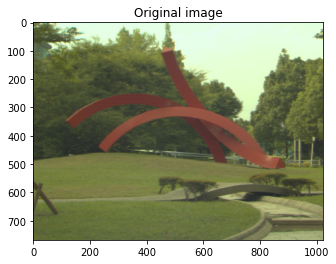

shape gray scale image (768, 1024)


Text(0.5, 1.0, 'Gray scale  image')

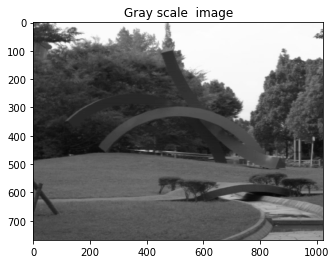

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.linalg as spl
img=mpimg.imread('0034.jpg')
print('shape original image',img.shape)
imgplot = plt.imshow(img)
plt.title('Original image')
plt.show()
# gray scale computation
rgb_weights = [0.2989, 0.5870, 0.1140]
imgg=np.dot(img,rgb_weights)
print('shape gray scale image',imgg.shape)
imgplot = plt.imshow(imgg,cmap=plt.get_cmap("gray"))
plt.title('Gray scale  image')

Compute:

1) the QR factorization with pivoting of the gray scale image such that: $imgg Pimg = Qimg Timg$ ;

2) the URV factorization: firstly, perform the QR factorization with pivoting; then perform the QR factorization on the resulting matrix Timg transposed so that $\,Timg^\top= Vimg Bimg$ and $\,imgg Pimg = Qimg Bimg^\top Vimg^\top$ ;

3) the thin SVD factorization of $imgg$, $A = Uimg Simg Vimg^\top$. 

To perform the QR factorization, use the scipy routine qr
of the  modulus linalg with pivoting set to 'true' in order to have 
the elements of the rectangular matrix sorted:   

[Qimg,Timg,Pimg]=spl.qr(imgg,pivoting=True)

note that $Pimg$ contains the index of the permuted columns 
of $imgg$. The algorithm finds an orthogonal matrix
$Qimg$ and a rectangular matrix $Rimg$ such that 
$imgg[:,Pimg]=Qimg*Timg$

Given the tolerances $1e-1, 5e-2, 1e-2, 5e-3$ for each tolerance compute several approximations of the matrix $imgg$ by choosing:

1) only the first $nc$ columns of the matrix $Qimg$ and $nc$ rows of the matrix $Timg$, where $nc$ is chosen with the following steps: 
  
  a) extract the diagonal elements of $Timg$ and copy them in $Tdiag$;
    
  b) scale the absolute values of $Tdiag$ with respect to its absolute maximum;
    
  c) compute $nc$ as the number of elements of $Tdiag$ that are greater than the chosen tolerance.
  
2) Only the first $nc$ columns of the matrix $Qimg$, $nc$ columns of the matrix $Vimg$ and the first $nc$ columns and $nc$ rows of the matrix $Bimg$ where $nc$ is chosen with the following steps: 

  a) extract the diagonal elements of $Bimg$ and copy them in $Bdiag$;
    
  b) scale the absolute values of $Bdiag$ with respect to its absolute maximum;
    
  c) compute $nc$ as the number of elements of $Bdiag$ that are greater than the chosen tolerance.

3) Only the first $nc$ right and left singular vectors and only $nc$ singular values where $nc$ is chosen with the following steps: 

  b) scale the singular values  with respect to the maximum singular value;
    
  c) compute $nc$ as  the number of the scaled singular values  that are greater than the chosen tolerance.
    
For each value of the tolerances plot the approximate images in gray scale.
To compare the results write a function that computes the correlation between the reconstructed image and the original one by reshaping the two images as two vectors. 

Comment the obtained results.
 

# Exercise 3

Use the steepest descend method and the Newton method  to approximate  the minimum (${\bf x}^{\star}=(1,1)^{T}$) of the function:
$$f({\bf x})=\frac{1}{2} 0.001(x_1-1)^2+(x_1^2-x_2)^2.$$

Compare the approximations computed by the two methods plotting:

1) the evaluation of the objective function at the vectors generated by the numerical methods;


2) the convergence order $p$ of the numerical scheme can be calculated with 
$$log \left(\frac{\|{\bf x}_{k}-{\bf x}^{\star}\|}{\|{\bf x}_{k+1}-{\bf x}^{\star}\|}\right)/ log \left(\frac{\|{\bf x}_{k-1}-{\bf x}^{\star}\|}{\|{\bf x}_k-{\bf x}^{\star}\|}\right)\approx p $$ for all $k >> 1$.

Use the same starting point and the same  stopping criterion. 
